In [1]:
import numpy as np

## Ошибка

In [3]:
Y = np.array([12, 40, 8, 60, 61])
Z = np.array([9, 36, 10, 57, 62])

(array([12, 40,  8, 60, 61]), array([ 9, 36, 10, 57, 62]))

In [6]:
Y-Z

array([ 3,  4, -2,  3, -1])

In [7]:
(Y - Z) ** 2

array([ 9, 16,  4,  9,  1])

In [9]:
print(((Y - Z) ** 2).sum())

print(sum((Y - Z) ** 2))

39
39


Буквально по формуле так:

In [10]:
((Y - Z) ** 2).sum() / 5

7.8

Если мы поняли, что в формуле знаменатель это просто количество, а числитель - сумма, то мы поняли, что это средний квадрат разности, и его можно посчитать вот так:


In [11]:
np.mean(((Y - Z) ** 2))

7.8

## Расчёт регрессии

In [2]:
pension = np.array([39, 48, 70])

In [8]:
mean = pension.mean()
print(mean)

# оба варианта дают правильный ответ
print(((pension - mean) ** 2).sum())
print(sum((pension - mean) ** 2))

52.333333333333336
508.66666666666663
508.66666666666663


In [32]:
SSx = sum((pension - mean) ** 2)

In [23]:
print((pension - mean) ** 2)

[177.77777778  18.77777778 312.11111111]


Если по действиям:

In [19]:
mean2 = (39 + 48 + 70) / 3
print(mean2)

52.333333333333336


In [20]:
print(39 - mean2)
print(48 - mean2)
print(70 - mean2)

-13.333333333333336
-4.333333333333336
17.666666666666664


In [21]:
print((39 - mean2) ** 2)
print((48 - mean2) ** 2)
print((70 - mean2) ** 2)

177.77777777777783
18.7777777777778
312.11111111111103


тесты

In [9]:
tests = np.array([9, 10, 9])

mean_tests = tests.mean()

SSy = sum((tests - mean_tests) ** 2)
print(SSy)

0.6666666666666666


Сумма произведений отклонений $SP$

In [25]:
pension = np.array([39, 48, 70])
tests = np.array([9, 10, 9])

In [28]:
print(pension * tests)
sum(pension * tests)

[351 480 630]


1461

In [29]:
pension.sum() * tests.sum() / len(pension)

1465.3333333333333

Сумма произведений отклонений

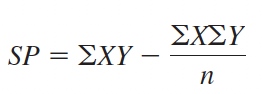

In [31]:
SP = sum(pension * tests) - (pension.sum() * tests.sum() / len(pension))
print(SP)

-4.3333333333332575


In [33]:
b = SP / SSx
print(b)

-0.00851900393184782


$test = pension * (-0.008) + ... $

In [34]:
pension * (-0.008)

array([-0.312, -0.384, -0.56 ])

In [10]:
import scipy.stats
X = pension
Y = tests

res = scipy.stats.linregress(X, Y)

print(f"y = {res.intercept} + {res.slope}x")

ModuleNotFoundError: No module named 'scipy'

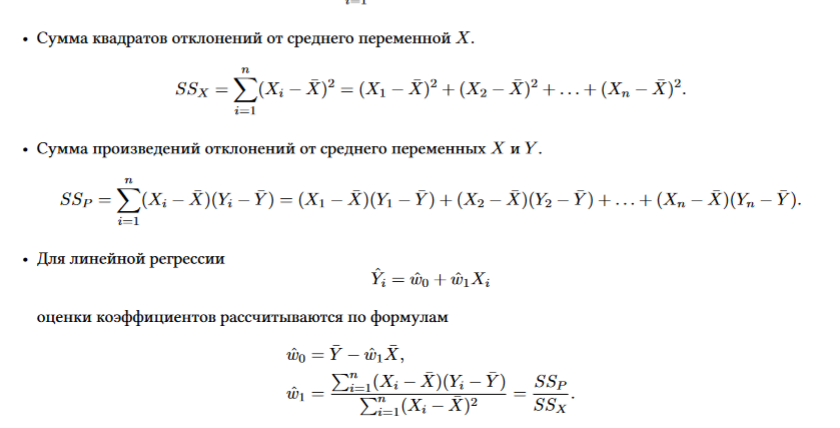

In [5]:
X = pension
Y = tests

X_mean = X.mean()
Y_mean = Y.mean()

print(X_mean, Y_mean)

# открываем доп. материал к экзамену и переписываем формулы весов
w1 = (
    ((X-X_mean)*(Y-Y_mean)).sum()
    / ((X-X_mean)**2).sum()
)

w0 = Y_mean - w1*X_mean

print(f'y = {w0} + {w1}*x')

52.333333333333336 9.333333333333334
y = 9.77916120576671 + -0.008519003931847968*x


In [7]:
round(w1, 2)

-0.01

## Коэффициент линейной корреляции Пирсона

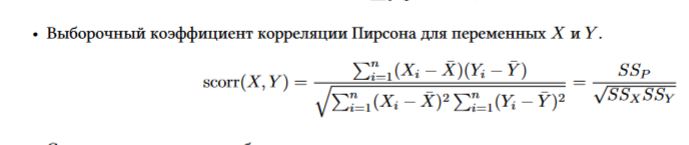

In [14]:
length = np.array([15, 12.1, 20, 24.2, 18.7])
mass = np.array([800, 495, 302, 1001, 256])

lenght_mean = length.mean()
mass_mean = mass.mean()

print(
    np.sum((length - lenght_mean) * (mass - mass_mean))
    / np.sqrt(np.sum((length - lenght_mean) ** 2) * np.sum((mass - mass_mean) ** 2))
)


0.27826085928877115


In [16]:
diff_length = (length - lenght_mean)
diff_mass = (mass - mass_mean)

(
    np.sum(diff_length * diff_mass)
    / np.sqrt(np.sum(diff_length ** 2) * np.sum(diff_mass ** 2))
)

0.27826085928877115

In [17]:
length = np.array([15, 12.1, 20, 24.2, 18.7])
mass = np.array([800, 495, 302, 1001, 256])

np.corrcoef(length, mass)

array([[1.        , 0.27826086],
       [0.27826086, 1.        ]])

In [17]:
import matplotlib.pyplot as plt

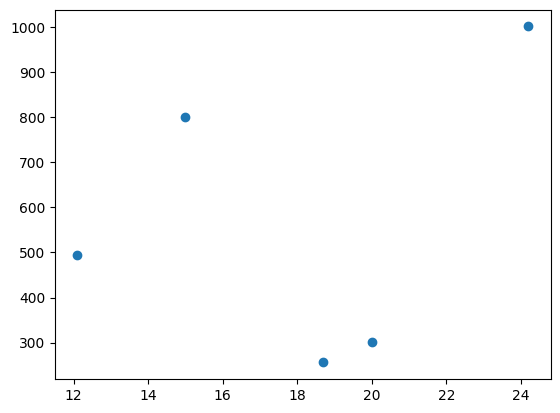

In [21]:
plt.scatter(length, mass)

По табличке `.csv`

In [1]:
import pandas as pd

In [4]:
# в той же папке что тетрадка
flats = pd.read_csv("moscow_flats.csv", sep="\t")
flats


,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
4,5,330,104,60,11.0,10.5,7,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,110,77,45,10.0,12.0,5,0,0,1,5
2036,2037,95,60,43,6.0,9.0,5,0,0,1,4
2037,2038,95,60,46,5.0,10.5,5,1,0,1,7
2038,2039,129,76,48,10.0,12.5,5,0,0,1,3


In [6]:
flats["walk"] == 1

0        True
1        True
2        True
3        True
4       False
        ...  
2035    False
2036    False
2037     True
2038    False
2039     True
Name: walk, Length: 2040, dtype: bool

In [8]:
metro_flats = flats[flats["walk"] == 1]
metro_flats

,n,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,code
0,1,81,58,40,6.0,12.5,7,1,1,1,3
1,2,75,44,28,6.0,13.5,7,1,0,1,6
2,3,128,70,42,6.0,14.5,3,1,1,1,3
3,4,95,61,37,6.0,13.5,7,1,0,1,1
5,6,137,76,50,9.0,11.0,7,1,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...
2031,2032,97,63,44,7.0,11.5,5,1,0,0,6
2033,2034,180,79,45,10.0,8.0,15,1,0,1,1
2034,2035,110,77,47,10.0,13.0,10,1,0,1,5
2037,2038,95,60,46,5.0,10.5,5,1,0,1,7


<Axes: xlabel='metrdist', ylabel='price'>

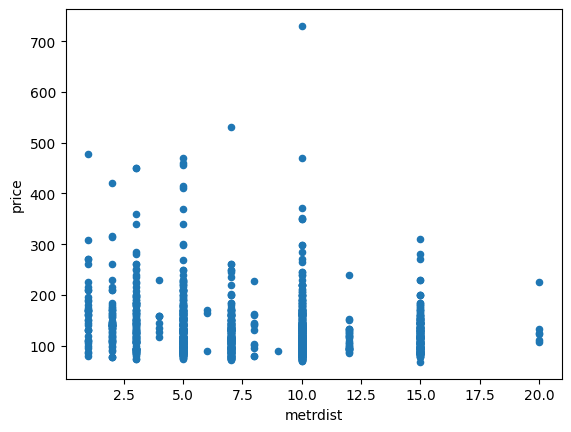

In [22]:
metro_flats.plot("metrdist", "price", kind="scatter")

In [23]:
metro_flats.groupby("metrdist")["price"].mean()

metrdist
1     171.358974
2     151.571429
3     152.896552
4     153.500000
5     137.107143
6     141.666667
7     124.819149
8     130.666667
9      90.000000
10    126.884793
12    116.233333
15    122.931937
20    137.333333
Name: price, dtype: float64

<Axes: xlabel='metrdist'>

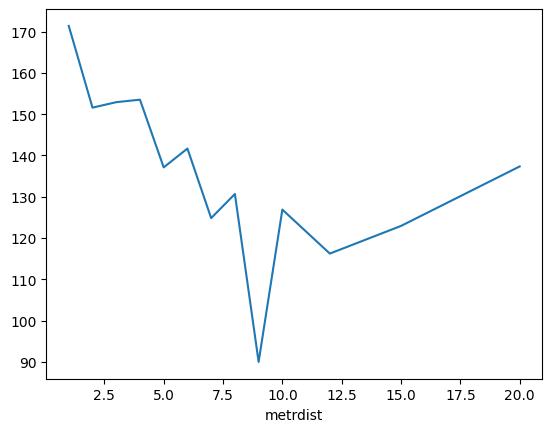

In [26]:
dist_grouped = metro_flats.groupby("metrdist")["price"].mean()

dist_grouped.plot()

## 20-22 про Макдональдс

In [28]:
mac = pd.read_csv("mcdonalds.csv")
mac

,category,item,calories,total_fat,calcium,sugars,protein
0,Breakfast,Egg McMuffin,300,20,25,3,17
1,Breakfast,Egg White Delight,250,12,25,3,18
2,Breakfast,Sausage McMuffin,370,35,25,2,14
3,Breakfast,Sausage McMuffin with Egg,450,43,30,2,21
4,Breakfast,Sausage McMuffin with Egg Whites,400,35,25,2,21
...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),510,26,40,64,12
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),690,35,50,85,15
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),340,17,25,43,8
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),810,50,60,103,21


In [29]:
mac.describe()

,calories,total_fat,calcium,sugars,protein
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,21.815385,20.973077,29.423077,13.338462
std,240.269886,21.885199,17.019953,28.679797,11.426146
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,3.750000,6.000000,5.750000,4.000000
50%,340.000000,17.000000,20.000000,17.500000,12.000000
75%,500.000000,35.000000,30.000000,48.000000,19.000000
max,1880.000000,182.000000,70.000000,128.000000,87.000000


Межквартильный интервал, interquartile range (IQR) это $3\ \text{квантиль (75\% перцентиль)} - 1\ \text{квантиль (25\% перцентиль)}$

In [33]:
mac["protein"].quantile(0.75) - mac["protein"].quantile(0.25)

15.0

Медиана — второй квартиль, 50% перцентиль, — делит (отсортированную по возрастанию) выборку пополам

In [34]:
mac["total_fat"].quantile(0.5)

17.0

### Напоминание о квартилях и перцентилях

99% перцентиль: 99% продуктов содержат меньше 41.64 белков, а 1% — больше

In [32]:
mac["protein"].quantile(0.99)

41.6400000000001

### По категориям

In [35]:
mac["category"] == "Breakfast"

0       True
1       True
2       True
3       True
4       True
       ...  
255    False
256    False
257    False
258    False
259    False
Name: category, Length: 260, dtype: bool

In [38]:
mac[mac["category"] == "Breakfast"]

,category,item,calories,total_fat,calcium,sugars,protein
0,Breakfast,Egg McMuffin,300,20,25,3,17
1,Breakfast,Egg White Delight,250,12,25,3,18
2,Breakfast,Sausage McMuffin,370,35,25,2,14
3,Breakfast,Sausage McMuffin with Egg,450,43,30,2,21
4,Breakfast,Sausage McMuffin with Egg Whites,400,35,25,2,21
5,Breakfast,Steak & Egg McMuffin,430,36,30,3,26
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",460,40,15,3,19
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",520,47,20,4,19
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",410,32,15,3,20
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",470,38,15,4,20


In [40]:
mac[mac["category"] == "Breakfast"]["calories"].mean()

526.6666666666666

можно сгруппировать!


In [42]:
mac.groupby("category")["calories"].mean()

category
Beef & Pork           494.000000
Beverages             113.703704
Breakfast             526.666667
Chicken & Fish        552.962963
Coffee & Tea          283.894737
Desserts              222.142857
Salads                270.000000
Smoothies & Shakes    531.428571
Snacks & Sides        245.769231
Name: calories, dtype: float64

In [43]:
mac.groupby("category")["calcium"].std()

category
Beef & Pork            5.916080
Beverages              8.083609
Breakfast              7.827147
Chicken & Fish         8.550004
Coffee & Tea          17.623651
Desserts              11.282097
Salads                 0.000000
Smoothies & Shakes    21.753550
Snacks & Sides         4.546061
Name: calcium, dtype: float64

In [44]:
mac[mac["category"] == "Chicken & Fish"]["calcium"].std()

8.550003748687137

❓Найти категорию самого калорийного продукта

In [45]:
mac.groupby("category")["calories"].max()

category
Beef & Pork            750
Beverages              280
Breakfast             1150
Chicken & Fish        1880
Coffee & Tea           760
Desserts               340
Salads                 450
Smoothies & Shakes     930
Snacks & Sides         510
Name: calories, dtype: int64

In [47]:
mac.sort_values("calories", ascending=False)

,category,item,calories,total_fat,calcium,sugars,protein
82,Chicken & Fish,Chicken McNuggets (40 piece),1880,182,8,1,87
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),1150,93,30,17,36
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),1090,87,25,17,36
34,Breakfast,Big Breakfast with Hotcakes and Egg Whites (La...,1050,77,25,18,35
33,Breakfast,Big Breakfast with Hotcakes and Egg Whites (Re...,990,70,25,17,35
...,...,...,...,...,...,...,...
117,Beverages,Diet Coke (Child),0,0,0,0,0
116,Beverages,Diet Coke (Large),0,0,0,0,0
115,Beverages,Diet Coke (Medium),0,0,0,0,0
114,Beverages,Diet Coke (Small),0,0,0,0,0


Найти категорию с определённым размахом (разницей между максимумом и минимумом)

In [50]:
def range(x):
    return x.max() - x.min()

mac.groupby("category")["calories"].apply(range)

category
Beef & Pork            510
Beverages              280
Breakfast             1000
Chicken & Fish        1690
Coffee & Tea           760
Desserts               295
Salads                 310
Smoothies & Shakes     720
Snacks & Sides         495
Name: calories, dtype: int64

Применить строковые методы (`.split()`) и разбить на несколько столбцов

In [60]:
mac["item"]

0                                           Egg McMuffin
1                                      Egg White Delight
2                                       Sausage McMuffin
3                              Sausage McMuffin with Egg
4                       Sausage McMuffin with Egg Whites
                             ...                        
255                   McFlurry with Oreo Cookies (Small)
256                  McFlurry with Oreo Cookies (Medium)
257                   McFlurry with Oreo Cookies (Snack)
258    McFlurry with Reese's Peanut Butter Cups (Medium)
259     McFlurry with Reese's Peanut Butter Cups (Snack)
Name: item, Length: 260, dtype: object

In [61]:
"Мама мыла раму".split()

['Мама', 'мыла', 'раму']

In [62]:
mac["item"].str.split()

0                                        [Egg, McMuffin]
1                                  [Egg, White, Delight]
2                                    [Sausage, McMuffin]
3                         [Sausage, McMuffin, with, Egg]
4                 [Sausage, McMuffin, with, Egg, Whites]
                             ...                        
255             [McFlurry, with, Oreo, Cookies, (Small)]
256            [McFlurry, with, Oreo, Cookies, (Medium)]
257             [McFlurry, with, Oreo, Cookies, (Snack)]
258    [McFlurry, with, Reese's, Peanut, Butter, Cups...
259    [McFlurry, with, Reese's, Peanut, Butter, Cups...
Name: item, Length: 260, dtype: object

In [63]:
"Cheese" in ["McFlurry", "with", "Oreo", "Cookies", '(Small)']

False

In [64]:
"Cheese" in ["Cheese", "with", "Oreo", "Cookies", '(Small)']

True

In [72]:
# def has_cheese_old(lst):
#     if "Cheese" in lst:
#         return True
#     else:
#         return False

def has_cheese_old(lst):
    return "Cheese" in lst

def has_cheese(lst):
    for item in lst:
        if "Cheese" in item:
            return True
    return False

mac["item"].str.split().apply(has_cheese)

0      False
1      False
2      False
3      False
4      False
       ...  
255    False
256    False
257    False
258    False
259    False
Name: item, Length: 260, dtype: bool

`["Pasta", "(Cheese)"]`

In [70]:
"Cheese" in ["Pasta", "(Cheese)"]

False

In [73]:
mac["item"].str.split().apply(has_cheese).sum()

16